## loading data set extracting features and then training and saving both features and trained model code ##

In [28]:
# Load imports
from scipy.io import wavfile as wav
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [29]:
import pandas as pd
filepath_or_buffer = '/home/ece/Videos/bike sp hj.csv'
pd.read_fwf(filepath_or_buffer, colspecs='infer', widths=None, infer_nrows=100)

,"file_name,class_name"
0,"2008 Kawasaki Ninja 250r.wav,KAWASAKI"
1,"Harley.wav,HARLEY"
2,"Harley-Davidson .wav,HARLEY"
3,"KTM Duke.wav,KTM"
4,"KTMRC125o.wav,KTM"
...,...
229,"KTM16.wav,KTM"
230,"KTM17.wav,KTM"
231,"KTM18.wav,KTM"
232,"KTM19.wav,KTM"


In [30]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [31]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/home/ece/Videos/bike sp'

metadata = pd.read_csv('/home/ece/Videos/bike sp hj.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["file_name"]))
    class_label = row["class_name"]
    
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 


Finished feature extraction from  234  files


In [32]:
print(metadata.class_name.value_counts())

KAWASAKI    40
ENFIELD     40
APACHE      40
PULSAR      40
HARLEY      40
KTM         34
Name: class_name, dtype: int64


In [33]:
import pickle
file1=open('/home/ece/Music/features  gh FINAL','wb')
pickle.dump(featuresdf,file1)
file1.close()

In [34]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

In [35]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.30, random_state = 42)

In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 4

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))



model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [37]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [38]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [39]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 400
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/home/ece/Music/weigh FINAtures.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/400
6/6 [==============================] - 0s 22ms/step - loss: 22.7966 - accuracy: 0.1288 - val_loss: 3.4010 - val_accuracy: 0.1831

Epoch 00001: val_loss improved from inf to 3.40099, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 2/400
6/6 [==============================] - 0s 14ms/step - loss: 15.9287 - accuracy: 0.1902 - val_loss: 1.9630 - val_accuracy: 0.2817

Epoch 00002: val_loss improved from 3.40099 to 1.96296, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 3/400
6/6 [==============================] - 0s 12ms/step - loss: 13.7894 - accuracy: 0.1656 - val_loss: 1.8358 - val_accuracy: 0.2817

Epoch 00003: val_loss improved from 1.96296 to 1.83578, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 4/400
6/6 [==============================] - 0s 13ms/step - loss: 10.3870 - accuracy: 0.1411 - val_loss: 1.7423 - val_accuracy: 0.3803

Epoch 00004: val_loss improved from 1.83578 to 1.74235, saving model to /home/ece/Music/weigh FINAtures.hdf5



Epoch 00073: val_loss improved from 1.02230 to 1.00607, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 74/400
6/6 [==============================] - 0s 12ms/step - loss: 1.3198 - accuracy: 0.4847 - val_loss: 0.9976 - val_accuracy: 0.7042

Epoch 00074: val_loss improved from 1.00607 to 0.99758, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 75/400
6/6 [==============================] - 0s 13ms/step - loss: 1.1727 - accuracy: 0.5644 - val_loss: 0.9896 - val_accuracy: 0.6901

Epoch 00075: val_loss improved from 0.99758 to 0.98960, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 76/400
6/6 [==============================] - 0s 13ms/step - loss: 1.3159 - accuracy: 0.4908 - val_loss: 0.9675 - val_accuracy: 0.7183

Epoch 00076: val_loss improved from 0.98960 to 0.96755, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 77/400
6/6 [==============================] - 0s 15ms/step - loss: 1.3575 - accuracy: 0.4908 - val_loss: 0.9443 - val_accuracy: 0.7


Epoch 00107: val_loss did not improve from 0.62959
Epoch 108/400
6/6 [==============================] - 0s 14ms/step - loss: 0.8551 - accuracy: 0.6810 - val_loss: 0.6294 - val_accuracy: 0.7746

Epoch 00108: val_loss improved from 0.62959 to 0.62940, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 109/400
6/6 [==============================] - 0s 13ms/step - loss: 0.9243 - accuracy: 0.6810 - val_loss: 0.6251 - val_accuracy: 0.7606

Epoch 00109: val_loss improved from 0.62940 to 0.62511, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 110/400
6/6 [==============================] - 0s 12ms/step - loss: 0.9007 - accuracy: 0.6933 - val_loss: 0.6391 - val_accuracy: 0.7606

Epoch 00110: val_loss did not improve from 0.62511
Epoch 111/400
6/6 [==============================] - 0s 13ms/step - loss: 0.8831 - accuracy: 0.6626 - val_loss: 0.6218 - val_accuracy: 0.8028

Epoch 00111: val_loss improved from 0.62511 to 0.62181, saving model to /home/ece/Music/weigh FINAtures.hdf

Epoch 144/400
6/6 [==============================] - 0s 13ms/step - loss: 0.7074 - accuracy: 0.7546 - val_loss: 0.3744 - val_accuracy: 0.8873

Epoch 00144: val_loss improved from 0.38974 to 0.37441, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 145/400
6/6 [==============================] - 0s 14ms/step - loss: 0.6797 - accuracy: 0.7485 - val_loss: 0.3625 - val_accuracy: 0.9577

Epoch 00145: val_loss improved from 0.37441 to 0.36250, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 146/400
6/6 [==============================] - 0s 12ms/step - loss: 0.7598 - accuracy: 0.6994 - val_loss: 0.3683 - val_accuracy: 0.9014

Epoch 00146: val_loss did not improve from 0.36250
Epoch 147/400
6/6 [==============================] - 0s 13ms/step - loss: 0.5775 - accuracy: 0.8037 - val_loss: 0.3676 - val_accuracy: 0.8873

Epoch 00147: val_loss did not improve from 0.36250
Epoch 148/400
6/6 [==============================] - 0s 14ms/step - loss: 0.5788 - accuracy: 0.7791 - val_lo

6/6 [==============================] - 0s 13ms/step - loss: 0.3210 - accuracy: 0.8896 - val_loss: 0.2016 - val_accuracy: 0.9577

Epoch 00181: val_loss did not improve from 0.17989
Epoch 182/400
6/6 [==============================] - 0s 13ms/step - loss: 0.2812 - accuracy: 0.9141 - val_loss: 0.1839 - val_accuracy: 0.9718

Epoch 00182: val_loss did not improve from 0.17989
Epoch 183/400
6/6 [==============================] - 0s 12ms/step - loss: 0.3513 - accuracy: 0.8896 - val_loss: 0.1714 - val_accuracy: 0.9859

Epoch 00183: val_loss improved from 0.17989 to 0.17136, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 184/400
6/6 [==============================] - 0s 13ms/step - loss: 0.3320 - accuracy: 0.9018 - val_loss: 0.1653 - val_accuracy: 0.9859

Epoch 00184: val_loss improved from 0.17136 to 0.16525, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 185/400
6/6 [==============================] - 0s 13ms/step - loss: 0.3649 - accuracy: 0.8834 - val_loss: 0.1632 - v

6/6 [==============================] - 0s 14ms/step - loss: 0.0733 - accuracy: 0.9816 - val_loss: 0.0599 - val_accuracy: 0.9859

Epoch 00258: val_loss improved from 0.06060 to 0.05992, saving model to /home/ece/Music/weigh FINAtures.hdf5
Epoch 259/400
6/6 [==============================] - 0s 14ms/step - loss: 0.1662 - accuracy: 0.9448 - val_loss: 0.0614 - val_accuracy: 0.9859

Epoch 00259: val_loss did not improve from 0.05992
Epoch 260/400
6/6 [==============================] - 0s 13ms/step - loss: 0.1010 - accuracy: 0.9693 - val_loss: 0.0639 - val_accuracy: 0.9859

Epoch 00260: val_loss did not improve from 0.05992
Epoch 261/400
6/6 [==============================] - 0s 13ms/step - loss: 0.1202 - accuracy: 0.9571 - val_loss: 0.0649 - val_accuracy: 0.9859

Epoch 00261: val_loss did not improve from 0.05992
Epoch 262/400
6/6 [==============================] - 0s 13ms/step - loss: 0.1174 - accuracy: 0.9632 - val_loss: 0.0663 - val_accuracy: 0.9859

Epoch 00262: val_loss did not improve


Epoch 00299: val_loss did not improve from 0.04539
Epoch 300/400
6/6 [==============================] - 0s 14ms/step - loss: 0.1340 - accuracy: 0.9571 - val_loss: 0.0812 - val_accuracy: 0.9859

Epoch 00300: val_loss did not improve from 0.04539
Epoch 301/400
6/6 [==============================] - 0s 13ms/step - loss: 0.1290 - accuracy: 0.9387 - val_loss: 0.0909 - val_accuracy: 0.9859

Epoch 00301: val_loss did not improve from 0.04539
Epoch 302/400
6/6 [==============================] - 0s 13ms/step - loss: 0.1552 - accuracy: 0.9509 - val_loss: 0.0998 - val_accuracy: 0.9859

Epoch 00302: val_loss did not improve from 0.04539
Epoch 303/400
6/6 [==============================] - 0s 14ms/step - loss: 0.1902 - accuracy: 0.9448 - val_loss: 0.1032 - val_accuracy: 0.9859

Epoch 00303: val_loss did not improve from 0.04539
Epoch 304/400
6/6 [==============================] - 0s 14ms/step - loss: 0.1365 - accuracy: 0.9755 - val_loss: 0.1001 - val_accuracy: 0.9859

Epoch 00304: val_loss did not

6/6 [==============================] - 0s 13ms/step - loss: 0.0668 - accuracy: 0.9755 - val_loss: 0.1268 - val_accuracy: 0.9859

Epoch 00342: val_loss did not improve from 0.04539
Epoch 343/400
6/6 [==============================] - 0s 14ms/step - loss: 0.0640 - accuracy: 0.9693 - val_loss: 0.1272 - val_accuracy: 0.9859

Epoch 00343: val_loss did not improve from 0.04539
Epoch 344/400
6/6 [==============================] - 0s 14ms/step - loss: 0.0870 - accuracy: 0.9816 - val_loss: 0.1230 - val_accuracy: 0.9859

Epoch 00344: val_loss did not improve from 0.04539
Epoch 345/400
6/6 [==============================] - 0s 13ms/step - loss: 0.1389 - accuracy: 0.9509 - val_loss: 0.1264 - val_accuracy: 0.9859

Epoch 00345: val_loss did not improve from 0.04539
Epoch 346/400
6/6 [==============================] - 0s 14ms/step - loss: 0.0923 - accuracy: 0.9571 - val_loss: 0.1371 - val_accuracy: 0.9859

Epoch 00346: val_loss did not improve from 0.04539
Epoch 347/400
6/6 [=========================


Epoch 00383: val_loss did not improve from 0.03351
Epoch 384/400
6/6 [==============================] - 0s 15ms/step - loss: 0.0874 - accuracy: 0.9755 - val_loss: 0.0595 - val_accuracy: 0.9859

Epoch 00384: val_loss did not improve from 0.03351
Epoch 385/400
6/6 [==============================] - 0s 15ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0674 - val_accuracy: 0.9859

Epoch 00385: val_loss did not improve from 0.03351
Epoch 386/400
6/6 [==============================] - 0s 17ms/step - loss: 0.0429 - accuracy: 0.9939 - val_loss: 0.0623 - val_accuracy: 0.9859

Epoch 00386: val_loss did not improve from 0.03351
Epoch 387/400
6/6 [==============================] - 0s 16ms/step - loss: 0.0719 - accuracy: 0.9755 - val_loss: 0.0552 - val_accuracy: 0.9859

Epoch 00387: val_loss did not improve from 0.03351
Epoch 388/400
6/6 [==============================] - 0s 18ms/step - loss: 0.0893 - accuracy: 0.9693 - val_loss: 0.0264 - val_accuracy: 0.9859

Epoch 00388: val_loss improve

In [44]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  0.98591548204422


In [45]:
y_pred =  model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  
print(confusion_matrix)

<function confusion_matrix at 0x7f3e1c9db790>


<AxesSubplot:>

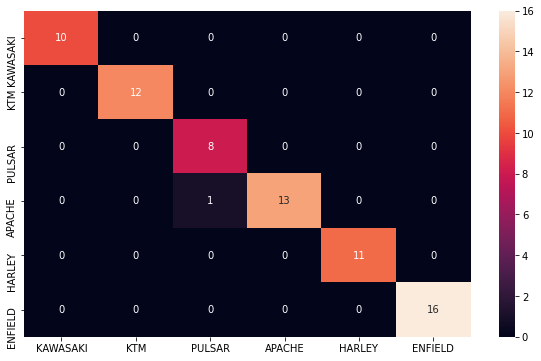

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm =confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  
index = ["KAWASAKI","KTM","PULSAR","APACHE","HARLEY","ENFIELD"]                   
columns = ["KAWASAKI","KTM","PULSAR","APACHE","HARLEY","ENFIELD"]  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [47]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [48]:

#global cur_labelb
#global print_prediction
#global cur_labelb
def print_prediction(file_name):
        prediction_feature = extract_feature(file_name) 
        predicted_vector = np.argmax(model.predict(prediction_feature), axis=-1)
        predicted_class = le.inverse_transform(predicted_vector) 
        print("The predicted class is:", predicted_class[0], '\n') 
        
        #label1 = tk.Label(root, text = str("The predicted class is:")+str( predicted_class[0])).place(x=600,y=900)
        #canvas.create_text(400,200, text = str("The predicted class is:")+str( predicted_class[0]),font =("Helvetica",15),fill="white")
        predicted_proba_vector = model.predict(prediction_feature) 
        predicted_proba = predicted_proba_vector[0]
               
        for i in range(len(predicted_proba)): 
            
            category = le.inverse_transform(np.array([i]))
            print(category[0], "\t\t : ", format(predicted_proba[i], '.5f') )
           
        

In [52]:
file_name='/home/ece/Videos/bike sp/3honda3.wav'
print_prediction(file_name)

The predicted class is: KAWASAKI 

APACHE 		 :  0.00503
ENFIELD 		 :  0.00038
HARLEY 		 :  0.00005
KAWASAKI 		 :  0.99299
KTM 		 :  0.00137
PULSAR 		 :  0.00018


In [19]:

def record(): 
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 5
    WAVE_OUTPUT_FILENAME = "file2.wav"
 
    audio = pyaudio.PyAudio()
    # start Recording
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
    print ("recording...")
    frames = []
 
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print ("finished recording")
    global cur_labela
    cur_labela=ttk.Label(canvas,text = "finished recording",style='green/black.TLabel')
    cur_labela.place(x=790,y=850)
 
    # stop Recording
    stream.stop_stream()
    stream.close()
    audio.terminate()
 
    waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()
def prd():
    filename = '/home/ece/Music/file2.wav' 
    print_prediction(filename)

def restart():
    cur_labela=ttk.Label(canvas,text = "                        ",style='green/black.TLabel')
    cur_labela.place(x=790,y=850)
    cur_labelb=ttk.Label(canvas,text = "                                     ", style='sp.TLabel')
    cur_labelb.place(x=790,y=900)
   
  
def play():
    pygame.mixer.init()
    pygame.mixer.music.load("/home/ece/Music/file2.wav")
    pygame.mixer.music.play(loops=0)
    
def openfile():
    filepath=filedialog.askopenfilename()
    print(filepath)
    print_prediction(filepath)
    

In [20]:
import pygame
import os
import pyaudio
import wave
from tkinter import ttk

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [21]:
from tkinter.ttk import *
from tkinter import *
import tkinter
from tkinter import filedialog
canvas = Tk()
canvas.geometry('1920x1080')
canvas = Canvas(width=1920, height=1080, bg='black')

canvas.pack(expand=YES, fill=BOTH)

gif1 = PhotoImage(file='fn.png')

canvas.create_image(0, 0, image=gif1, anchor=NW)
style = ttk.Style()
ttk.Style().configure('green/black.TLabel',font=('Helvetica', 20,'bold'), foreground='#e9d10a', background='#020613')
ttk.Style().configure('green/black.TButton',font=('Helvetica', 20,'bold'), foreground='#1164e8', background='#010101')
ttk.Style().configure('sp.TLabel',font=('ariel', 25,'bold'), foreground='#e25d12', background='#020613')

button_rec = ttk.Button(canvas, text='START' ,style='green/black.TButton',command=record)
button_rec.place(x=500,y=750)

button_rec = ttk.Button(canvas, text='PREDICT',style='green/black.TButton',command=prd)
button_rec.place(x=1280,y=750) 

button_rec = ttk.Button(canvas, text='PREDICT from FILE',style='green/black.TButton',command=openfile)
button_rec.place(x=1280,y=850) 

button_rec = ttk.Button(canvas, text='RESET',style='green/black.TButton',command=restart)
button_rec.place(x=880,y=950)

play_button = ttk.Button(canvas, text='PLAY',style='green/black.TButton', command=play)
play_button.place(x=880,y=280)
mainloop()